In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def impute_nan_with_median(table):
    for col in table.columns:
        table[col]= table[col].fillna(table[col].median())
    return table   

In [3]:
data = pd.read_csv('../../data/credit_scoring_sample.csv', sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [4]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Distribution of target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

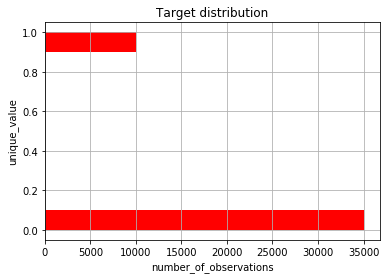

In [5]:
ax = data['SeriousDlqin2yrs'].hist(orientation='horizontal', color='red')
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print('Distribution of target:')
data['SeriousDlqin2yrs'].value_counts(normalize=True) 

In [6]:
independent_columns_names = data.columns.values
independent_columns_names = [x for x in data if x != 'SeriousDlqin2yrs']
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [9]:
table = impute_nan_with_median(data)
table

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,5166.0,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...,...
45058,1,31,0,0.824725,0,0,3000.0,1.0
45059,0,49,0,6530.000000,0,0,0.0,5.0
45060,1,38,0,0.475841,0,0,3000.0,2.0
45061,0,47,1,0.485198,0,0,11720.0,5.0


In [87]:
X = table[independent_columns_names]
y = table['SeriousDlqin2yrs']

In [88]:
X

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0,0.249908,0,0,8158.0,0.0
1,58,0,3870.000000,0,0,5166.0,0.0
2,41,0,0.456127,0,0,6666.0,0.0
3,43,0,0.000190,0,0,10500.0,2.0
4,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...
45058,31,0,0.824725,0,0,3000.0,1.0
45059,49,0,6530.000000,0,0,0.0,5.0
45060,38,0,0.475841,0,0,3000.0,2.0
45061,47,1,0.485198,0,0,11720.0,5.0


In [18]:
SEED = 17

In [16]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# сохранение в отдельные numpy массивы данных по лояльным и уже бывшим клиентам
good_income = table[table['SeriousDlqin2yrs'] == 0]['MonthlyIncome'].values
bad_income = table[table['SeriousDlqin2yrs'] == 1]['MonthlyIncome'].values

# ставим seed для воспроизводимости результатов
np.random.seed(17)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
good_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(good_income, 2000)]
bad_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(bad_income, 2000)]

good_intervals = stat_intervals(good_mean_scores, 0.2)
bad_intervals = stat_intervals(bad_mean_scores, 0.2)

#  выводим интервальную оценку среднего
print("MonthlyIncome good:  mean interval", good_intervals)
print("MonthlyIncome bad:  mean interval", bad_intervals)
print("Interval estimate of the average income: ", good_intervals[0] - bad_intervals[1])

MonthlyIncome good:  mean interval [6310.92322402 6478.45869224]
MonthlyIncome bad:  mean interval [5486.3783862 5625.3523838]
Interval estimate of the average income:  685.5708402182063


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [20]:
dt = DecisionTreeClassifier(random_state=SEED, class_weight='balanced')

In [21]:
max_depth_values = [5, 6, 7, 8, 9]
max_features_values = [4, 5, 6, 7]
tree_params = {'max_depth': max_depth_values,
               'max_features': max_features_values}

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [23]:
grid_searcher = GridSearchCV(estimator=dt, param_grid=tree_params,
                                  scoring='roc_auc', n_jobs=1, cv=skf, verbose=1)

In [24]:
grid_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
          

In [25]:
grid_searcher.cv_results_ 

{'mean_fit_time': array([0.04732533, 0.04913025, 0.05735269, 0.05955834, 0.04892921,
        0.0581552 , 0.06396976, 0.06838136, 0.05233912, 0.06336803,
        0.07098832, 0.07780695, 0.05875587, 0.07038679, 0.07760606,
        0.08502569, 0.06236596, 0.07359591, 0.08582845, 0.09244518]),
 'std_fit_time': array([0.00223283, 0.00089687, 0.00075007, 0.00049109, 0.00075037,
        0.00228684, 0.00040085, 0.00098224, 0.0013306 , 0.00040116,
        0.00075028, 0.00174863, 0.00049144, 0.00075027, 0.0016291 ,
        0.00098266, 0.00075006, 0.001023  , 0.00150084, 0.00040123]),
 'mean_score_time': array([0.00441189, 0.00421128, 0.00441151, 0.00401087, 0.00421171,
        0.00461311, 0.00441236, 0.00441246, 0.00461254, 0.00461264,
        0.00421152, 0.00421128, 0.00481305, 0.00461249, 0.00481315,
        0.00461216, 0.00461216, 0.00441175, 0.00461211, 0.00501409]),
 'std_score_time': array([4.91381036e-04, 4.01091586e-04, 4.91400470e-04, 6.97552626e-07,
        4.00877297e-04, 4.91206582e-

In [27]:
grid_searcher.best_params_, grid_searcher.best_score_

({'max_depth': 7, 'max_features': 6}, 0.8218995438508803)

In [35]:
prediction = grid_searcher.best_estimator_.predict_proba(X)
pd.DataFrame(prediction)

,0,1
0,0.846808,0.153192
1,0.797717,0.202283
2,0.552827,0.447173
3,0.765202,0.234798
4,0.667707,0.332293
...,...,...
45058,0.469771,0.530229
45059,0.735535,0.264465
45060,0.667707,0.332293
45061,0.344097,0.655903


In [34]:
prediction

array([[0.8468078 , 0.1531922 ],
       [0.79771698, 0.20228302],
       [0.5528267 , 0.4471733 ],
       ...,
       [0.6677068 , 0.3322932 ],
       [0.3440975 , 0.6559025 ],
       [0.24802468, 0.75197532]])

In [37]:
list(np.random.choice(len(X), 5000, replace=True))

[18174,
 14221,
 29114,
 38341,
 9914,
 24251,
 9080,
 31950,
 10594,
 25025,
 3435,
 30229,
 11005,
 44722,
 34965,
 37377,
 37484,
 34915,
 1667,
 19702,
 24033,
 6616,
 3338,
 37771,
 37455,
 20633,
 4553,
 4124,
 16481,
 19571,
 44462,
 42894,
 5513,
 42516,
 40841,
 25120,
 16650,
 19297,
 8196,
 6695,
 9933,
 6666,
 31488,
 27303,
 33819,
 23442,
 14253,
 40700,
 33535,
 30138,
 42551,
 7259,
 44261,
 3203,
 18025,
 35533,
 4675,
 38967,
 31884,
 29641,
 34922,
 18282,
 7057,
 9305,
 34102,
 7847,
 37256,
 22985,
 5497,
 12877,
 41365,
 15930,
 42923,
 19681,
 4633,
 19577,
 34047,
 42785,
 44877,
 21243,
 7094,
 6731,
 44719,
 21549,
 44613,
 26963,
 23144,
 4596,
 32840,
 35561,
 32395,
 25403,
 5621,
 8696,
 27158,
 7069,
 35619,
 20085,
 36701,
 17145,
 13324,
 33833,
 38475,
 23794,
 13562,
 5752,
 5548,
 10415,
 27242,
 39273,
 31877,
 27033,
 17912,
 8075,
 40207,
 39421,
 25270,
 25671,
 14367,
 10999,
 34167,
 42690,
 14124,
 16251,
 7684,
 27559,
 418,
 7912,
 10677,
 8

In [100]:
X

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0,0.249908,0,0,8158.0,0.0
1,58,0,3870.000000,0,0,5166.0,0.0
2,41,0,0.456127,0,0,6666.0,0.0
3,43,0,0.000190,0,0,10500.0,2.0
4,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...
45058,31,0,0.824725,0,0,3000.0,1.0
45059,49,0,6530.000000,0,0,0.0,5.0
45060,38,0,0.475841,0,0,3000.0,2.0
45061,47,1,0.485198,0,0,11720.0,5.0


In [112]:
feat_ids_by_tree = np.random.choice(X.columns.values, 5, replace=False)
full = X[:]
full['target'] = y
indices = list(np.random.choice(len(full), 5000, replace=True))
sample_full = full.iloc[indices,:]
sample_y = sample_full['target']
sample_X = sample_full.drop('target', axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
sample_y

7884     0
14206    0
28270    1
25711    0
9373     1
        ..
33861    0
5322     0
15597    0
8298     0
41710    1
Name: target, Length: 5000, dtype: int64

In [114]:
X

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0,0.249908,0,0,8158.0,0.0
1,58,0,3870.000000,0,0,5166.0,0.0
2,41,0,0.456127,0,0,6666.0,0.0
3,43,0,0.000190,0,0,10500.0,2.0
4,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...
45058,31,0,0.824725,0,0,3000.0,1.0
45059,49,0,6530.000000,0,0,0.0,5.0
45060,38,0,0.475841,0,0,3000.0,2.0
45061,47,1,0.485198,0,0,11720.0,5.0


In [115]:
feat_ids_by_tree

array(['NumberOfTimes90DaysLate', 'age', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfTime30-59DaysPastDueNotWorse'], dtype=object)

In [117]:
type(X)

pandas.core.frame.DataFrame

In [123]:
scores = [0.82521882, 0.82375317, 0.82221757, 0.82163112, 0.82824876,
        0.82852962, 0.82824833, 0.82764031, 0.83022759, 0.8301791 ,
        0.82993656, 0.8300347 , 0.83209075, 0.83140758, 0.83052191,
        0.83035415, 0.8301337 , 0.8309104 , 0.83012269, 0.82903699]

In [124]:
sum(scores) / len(scores)

0.828522191